In [49]:
import matplotlib.pyplot as plt

In [50]:
# A (x1, y1, z1)
# B (x2, y2, z2)
# C (x3, y3, z3)

def three_points_on_one_line(A, B, C):
    if (C[0] - A[0]) * (B[1] - A[1]) == (B[0] - A[0]) * (C[1] - A[1]) and \
    (C[1] - A[1]) * (B[2] - A[2]) == (B[1] - A[1]) * (C[2] - A[2]):
        return True
    return False

In [51]:
# vector1 = (x1, y1, z1)
# vector2 = (x2, y2, z2)

def vector_product(vector1, vector2):
    return (vector1[1] * vector2[2] - vector2[1] * vector1[2],
            vector1[2] * vector2[0] - vector1[0] * vector2[2],
            vector1[0] * vector2[1] - vector2[0] * vector1[1])

In [52]:
# A (x1, y1, z1)
# B (x2, y2, z2)

def midpoint(A, B):
    return ((A[0] + B[0]) / 2,
            (A[1] + B[1]) / 2,
            (A[2] + B[2]) / 2)

In [53]:
# A (x1, y1, z1)
# vector = (x2, y2, z2)

def point_plus_vector(A, vector):
    return (A[0] + vector[0], A[1] + vector[1], A[2] + vector[2])

In [54]:
# beginning (x1, y1, z1)
# end (x2, y2, z2)

def get_vector(beginning, end):
    return (end[0] - beginning[0], end[1] - beginning[1], end[2] - beginning[2])

In [55]:
# vector = (x, y, z)

def length(vector):
    return (vector[0] ** 2 + vector[1] ** 2 + vector[2] ** 2) ** 0.5

In [56]:
# vector = (x, y, z)

def multiply_by_number(vector, n):
    return (vector[0] * n, vector[1] * n, vector[2] * n)

In [57]:
# sample = (x1, y1, z1)
# changeable_vector = (x2, y2, z2)

def make_same_length(sample, changeable_vector):
    sample_length = length(sample)
    changeable_vector_length = length(changeable_vector)
    return multiply_by_number(changeable_vector, sample_length / changeable_vector_length)

In [58]:
# A (x, y, z)

def from3Dto2D_xOy(A):
    return (A[0], A[1])

In [59]:
def draw(pairs):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)

    for pair in pairs:
        plt.plot(pair[0], pair[1])
    
    automin, automax = plt.xlim()
    plt.xlim(automin-0.5, automax+0.5)
    automin, automax = plt.ylim()
    plt.ylim(automin-0.5, automax+0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.show()

In [61]:
def cube_solution(A, B, C):
    if three_points_on_one_line(A, B, C):
        print("Three points lie on the same straight line!")
        return;
    vector1 = get_vector(A, B)
    vector2 = get_vector(A, C)
    perpendicular = vector_product(vector1, vector_product(vector2, vector1))
    perpendicular = make_same_length(vector1, perpendicular)
    X = point_plus_vector(A, perpendicular)
    Y = point_plus_vector(X, vector1)
    
    perpendicular = vector_product(vector1, perpendicular)
    perpendicular = make_same_length(vector1, perpendicular)
    AA = point_plus_vector(A, perpendicular)
    BB = point_plus_vector(B, perpendicular)
    XX = point_plus_vector(X, perpendicular)
    YY = point_plus_vector(Y, perpendicular)
    
    points_for_drawing = [from3Dto2D_xOy(point) for point in [A, B, Y, X, AA, BB, YY, XX]]
    code_pairs = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 4), (1, 5), (2, 6), (3, 7), (4, 5), (5, 6), (6, 7), (7, 4)]
    
    pairs = []
    for code in code_pairs:
        pairs.append(([points_for_drawing[code[0]][0], points_for_drawing[code[1]][0]], 
                      [points_for_drawing[code[0]][1], points_for_drawing[code[1]][1]]))
    draw(pairs)
    return points_for_drawing

In [62]:
def pyramid_solution(A, B, C):
    if three_points_on_one_line(A, B, C):
        print("Three points lie on the same straight line!")
        return;
    vector1 = get_vector(A, B)
    vector2 = get_vector(A, C)
    perpendicular = vector_product(vector1, vector_product(vector2, vector1))
    perpendicular = make_same_length(vector1, perpendicular)
    X = point_plus_vector(A, perpendicular)
    Y = point_plus_vector(X, vector1)
    
    centre = midpoint(B, X)
    perpendicular = vector_product(vector1, perpendicular)
    perpendicular = make_same_length(vector1, perpendicular)
    perpendicular = multiply_by_number(perpendicular, 1 / (2 ** 0.5))
    O = point_plus_vector(centre, perpendicular)
    
    points_for_drawing = [from3Dto2D_xOy(point) for point in [A, B, Y, X, O]]
    code_pairs = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 4), (1, 4), (2, 4), (3, 4)]
    
    pairs = []
    for code in code_pairs:
        pairs.append(([points_for_drawing[code[0]][0], points_for_drawing[code[1]][0]], 
                      [points_for_drawing[code[0]][1], points_for_drawing[code[1]][1]]))
        
    draw(pairs)
    return points_for_drawing

In [63]:
def tetrahedron_solution(A, B, C):
    if three_points_on_one_line(A, B, C):
        print("Three points lie on the same straight line!")
        return;
    vector1 = get_vector(A, B)
    vector2 = get_vector(A, C)
    centreAB = midpoint(A, B)
    perpendicular = vector_product(vector1, vector_product(vector2, vector1))
    perpendicular = make_same_length(vector1, perpendicular)
    perpendicular = multiply_by_number(perpendicular, (3 ** 0.5) / 2)
    X = point_plus_vector(centreAB, perpendicular)
    
    centre = point_plus_vector(centreAB, multiply_by_number(perpendicular, 1 / 3))
    vectorAX = get_vector(A, X)
    perpendicular = vector_product(vector1, vectorAX)
    perpendicular = make_same_length(vector1, perpendicular)
    perpendicular = multiply_by_number(perpendicular, (2 / 3) ** 0.5)
    O = point_plus_vector(centre, perpendicular)
    
    points_for_drawing = [from3Dto2D_xOy(point) for point in [A, B, X, O]]
    code_pairs = [(0, 1), (1, 2), (2, 0), (0, 3), (1, 3), (2, 3)]
    
    pairs = []
    for code in code_pairs:
        pairs.append(([points_for_drawing[code[0]][0], points_for_drawing[code[1]][0]], 
                      [points_for_drawing[code[0]][1], points_for_drawing[code[1]][1]]))
        
    draw(pairs)
    return points_for_drawing

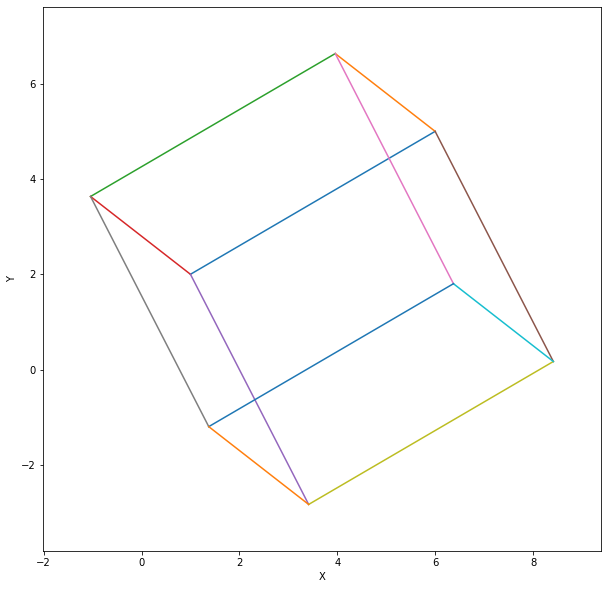

Projections:
A: (1, 2)
B: (6, 5)
Y: (3.958758547680685, 6.6329931618554525)
X: (-1.0412414523193152, 3.632993161855452)
AA: (3.41522945769824, -2.8304589153964796)
BB: (8.41522945769824, 0.16954108460352035)
YY: (6.373988005378925, 1.8025342464589729)
XX: (1.3739880053789246, -1.1974657535410276)


In [64]:
cube_points = cube_solution((1, 2, 3), (6, 5, 4), (7, 8, 9))

points = ["A", "B", "Y", "X", "AA", "BB", "YY", "XX"]
print("Projections:")
for i in range(8):
    print(f"{points[i]}: {cube_points[i]}")

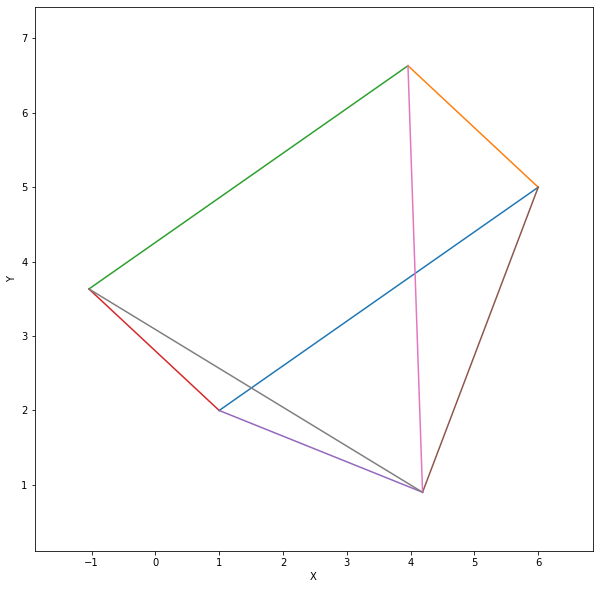

Projections:
A: (1, 2)
B: (6, 5)
Y: (3.958758547680685, 6.6329931618554525)
X: (-1.0412414523193152, 3.632993161855452)
O: (4.187204401500275, 0.9008463256078603)


In [65]:
pyramid_points = pyramid_solution((1, 2, 3), (6, 5, 4), (7, 8, 9))

points = ["A", "B", "Y", "X", "O"]
print("Projections:")
for i in range(5):
    print(f"{points[i]}: {pyramid_points[i]}")

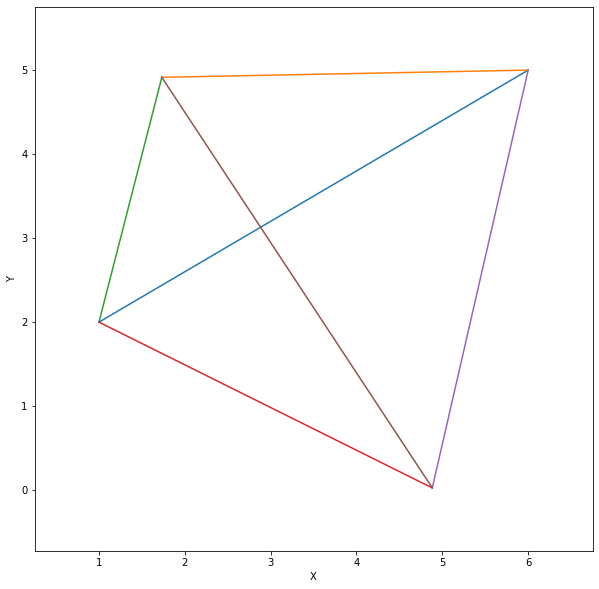

Projections:
A: (1, 2)
B: (6, 5)
X: (3.958758547680685, 6.6329931618554525)
O: (-1.0412414523193152, 3.632993161855452)


In [66]:
tetrahedron_points = tetrahedron_solution((1, 2, 3), (6, 5, 4), (7, 8, 9))

points = ["A", "B", "X", "O"]
print("Projections:")
for i in range(4):
    print(f"{points[i]}: {pyramid_points[i]}")

In [67]:
cube_solution((1, 1, 1), (3, 3, 3), (10, 10, 10))

Three points lie on the same straight line!
